

# Problem Set 1



## Preamble

To run and solve this assignment, one must have a working IPython Notebook installation. The easiest way to set it up is to open the assignment by [Google Colab](https://colab.research.google.com/). It is an online platform which already has the environment set up for this assignment.

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctr+Enter` or `[>|]`(like "play") button above. To edit any code or text cell [double]click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

We highly encourage students to put down their derivations into corresponding cells below. However, if one does not know LaTeX (and would find it too hard to learn it by looking at examples listed below between \$..\$), you might pass it in pen-and-paper format, however grading of these submissions might be delayed.

Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctr+Enter to render text. [Double]click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission instructions: please upload your completed solution .ipynb file to [Gradescope](https://www.gradescope.com/courses/591156) (Entry code: GP5DK6) by **Sep 25, 10PM EST**. If you have pen-and-paper answers, please hand them in class on the same due day.

`Vector` stands for `column vector` below. Show all steps when proving statements.

### Problem 1: Review of Probability and Statistics (20 points)

**Q1.1**: $X$ and $Y$ are random variables. The expectation of $X$ is  $E(X)$ and the variance of $X$ is $Var(X)$.  The expectation of $Y$ is  $E(Y)$ and the variance of $X$ is $Var(Y)$. Prove the following:

(a) $E(aX+bY) = aE(X)+bE(Y)$

(b) $Var(aX+bY) = a^2 Var(X) + b^2Var(Y) + 2abCov(X,Y)$, where $Cov(X,Y)$ is covariance of X and Y.

For simplicity, we can assume that $X$ and $Y$ are continuous random variables.


**Q1.2 (a)** Assume that we have n observations $x_1,...,x_n$, each from a normal distribution $X_i\sim N(\mu, \sigma^2)$. The observations are correlated, i.e. $Corr(X_i, X_j)=\rho$. Derive the logarithm of the Likelihood function: $\log P(x_1, \dots, x_n ; \mu, \sigma)$.

**Hint:** $X = (x_1,\ldots, x_n)^\prime$ can be viewed as a single sample of a $n$-variate Normal distribution.


**(b)** Compute the maximum likelihood estimates for $\mu$ and $\sigma^2$.

**`[double click here to add a solution]`**

**(c)** In this problem, we run stimulation experiments to compare the behavior between the usual variance estimator for indenpendent samples, and the variance estimator that accounts for correlation, derived in Q1.2 (a). In the code below, we generate correlated observation from $N(0, 1)$. Complete the estimator function `iid_estimator` and `corr_estimator` below for the usual variance estimator for indenpendent samples, and the variance estimator that accounts for correlation, and analyze the simulation results.

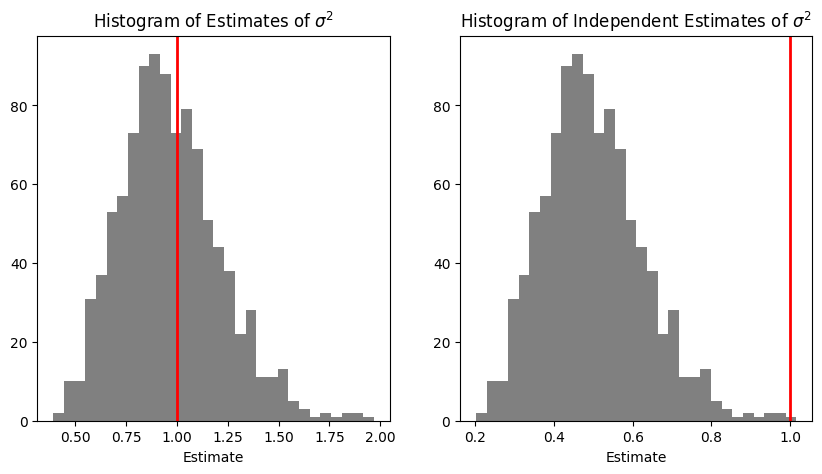

In [1]:
# Coding part for Q 1.2(c)
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

def iid_estimator(x):
  # ----  Complete the code here
  # iid estimator = (1/(n-1)) * sum((x_i - x_mean)^2)
  m = len(x) - 1
  iid = (1/m) * np.sum((x - np.mean(x))**2)
  return iid

def corr_estimator(x, R):
  # ---- Complete the code here
  # corr estimator = (1/m) * (x - x_mean)^T * R * (x - x_mean)
  m = len(x)
  x_centered = x - np.mean(x)
  inverse_R = np.linalg.inv(R)
  corr = (1/m) * x_centered.T @ inverse_R @ x_centered
  return corr

n = 32
sigma = 1
n_sim = 1000
rho = 0.5
np.random.seed(101)

# Prepare the correlation matrix
R = np.ones((n,n)) * rho
np.fill_diagonal(R, 1)

# Run the simulation
sim = np.zeros((2, n_sim))
for i in range(n_sim):
    x = multivariate_normal.rvs(mean=np.zeros(n), cov=R * (sigma**2), size=1)
    sim[:, i] = [corr_estimator(x, R), iid_estimator(x)]

# Plot the result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(sim[0, :], color='gray', bins=30)
plt.xlabel('Estimate')
plt.title('Histogram of Estimates of $\\sigma^2$')
plt.axvline(x=sigma**2, color='red', linewidth=2)

plt.subplot(1, 2, 2)
plt.hist(sim[1, :], color='gray', bins=30)
plt.xlabel('Estimate')
plt.title('Histogram of Independent Estimates of $\\sigma^2$')
plt.axvline(x=sigma**2, color='red', linewidth=2)

Analyses of the simulation results:

- The idd estimator underestimates the true population variance because it does not take into account the correlation structure among the data points.
- On the other hand, the correlation estimator takes the correlation into account by using the correlation matrix (R) to adjust the variance estimate.
- Therefore, the correlation estimator produces more accuracy and less bias in variance estimates when our data exhibits correlation.

**Q1.3**:Let $(X, Y)$ be uniform on the unit square. Let $Z = X/Y$.
Find the probability density function (pdf) of $Z$.

**Hint:** pdf is the derivative of cumulative density function (cdf).

**`[double click here to add a solution]`**

**Q1.4** Let's assume that a binary classifier has a false positive rate of 0.01 (test positive but is actually negative), false negative rate of 0.3 (test negative but is actually positive). Assume that 20% of the samples are labled as postive. If one sample were predicted as negative by the model, what are the likelihood that the sample is labeled as postive? (Show your steps)

**`[double click here to add a solution]`**

### Problem 2: Exponential Family (20 points)

**Note:** If the equation below doesn't show correctly, you can download the PDF version of the question 2 [here](https://drive.google.com/file/d/1FnkIH58hfBk3DvSuamte_DT91wrD7x8O/view?usp=sharing).

In your previous machine learning courses, you've likely encountered various types of probability distributions like Gaussian, Poisson, and Bernoulli. You may not know that these distributions are part of a larger, unified framework known as the "exponential family" of distributions. Understanding the exponential family is crucial for advancing machine learning and statistics because it provides a general way to express a wide range of probability distributions using a standard form. This unified representation makes it easier to develop algorithms and statistical methods that can work across different types of data.



The exponential family of distributions can be expressed in a canonical form as follows:

\begin{equation}
p({\mathbf{x}} ; \boldsymbol{\theta}) = h(\mathbf{x}) \exp \left( \boldsymbol{\eta}(\boldsymbol{\theta}) \cdot \mathbf{T}(\mathbf{x}) - A(\boldsymbol{\theta}) \right)
\end{equation}

Here's what each term represents:


     
- $\mathbf{x}$ is the observed data, which can be potentially high-dimensional vector

- $ \boldsymbol{\theta} $ are the natural parameters of the distribution, which is a vector
- $ h(\mathbf{x}) $ is the base measure, which is a function of the data $ \mathbf{x} $.
- $ \boldsymbol{\eta}(\boldsymbol{\theta}) $ is a function mapping the natural parameters $ \boldsymbol{\theta} $ to the canonical parameters.
- $ \mathbf{T}(\mathbf{x}) $ is the sufficient statistic, which is a function of the data $ \mathbf{x} $. In the machine learning community, $\mathbf{T}(\mathbf{x})$ is sometimes called the feature vector of the distribution.
- $ A(\boldsymbol{\theta}) $ is the log-partition function, which ensures that the distribution integrates with 1.
- $\boldsymbol{\eta}(\boldsymbol{\theta}) \cdot \mathbf{T}(\mathbf{x})$ denotes the inner product between the two vectors,  $\mathbf{T(x)}$ and $\boldsymbol{\eta}(\boldsymbol{\theta})$



The beauty of this formulation is its generality. By choosing different forms for $ h(\mathbf{x}) $, $ \boldsymbol{\eta}(\boldsymbol{\theta}) $, $ \mathbf{T}(\mathbf{x}) $, and $ A(\boldsymbol{\theta}) $, you can derive a wide range of specific distributions like Gaussian, Poisson, and Bernoulli.

The expression may look scary at the beginning. Let us start with a probability density you are the most familiar with and make it look like a member of the exponential family: univariate Gaussian distribution!

\\

**Q2.1 (warm up)**: The density function of the Gaussian distribution has the following form:
\begin{equation}
p(x ; \mu, \sigma) = \frac{1}{\sigma\sqrt{2 \pi}} \exp \left( - \frac{(x - \mu)^2}{2\sigma^2} \right),
\end{equation}

in this case $\boldsymbol{\theta} = [\mu, \sigma]$, a two dimensional vector, is a natural parameters.

-- Derive the forms of sufficient statistics $ \mathbf{T}(\mathbf{x}) $ , the canonical form of the parameters  $ \boldsymbol{\eta}(\boldsymbol{\theta}) $ , the log partition function $ A(\boldsymbol{\theta})$   and the base measure $h(x)$.

**Hint:** Expand the parenthesis inside the argument of the exponent. First, collect all terms that only involve $\boldsymbol{\theta}$ and no $\mathbf{x}$, that is  $A(\boldsymbol{\theta})$. Then, collect all terms with only $\mathbf{x}$ and no $\boldsymbol{\theta}$; that is your $h(\mathbf{x})$. The remaining terms involve $\mathbf{x}$ and $\boldsymbol{\theta}$. Create two vectors to express this joint term as an inner product term.  


**`[double click here to add a solution]`**

**Q2.2 (Multi-variate Gaussian distribution)**: The probability distribution of a $k$-dimensional Gaussian distribution has the following form:
\begin{equation*}
p(\mathbf{x} ; \boldsymbol{\mu}, \boldsymbol{\Sigma}) = \frac{1}{\sqrt{ (2\pi)^k \det(\boldsymbol{\Sigma}) }} \exp \left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right),
\end{equation*}
where $\boldsymbol{\mu}$ and $\boldsymbol{\Sigma}$ are the mean and covariance matrix respective and the $\det(\boldsymbol{\Sigma})$ denotes the determinant of the  covariance matrix. In this equation $\boldsymbol{\theta} = [\boldsymbol{\mu} , vec(\boldsymbol{\Sigma})]$, $vec(\cdot)$ denotes creating a vector from a matrix by concatenating its rows into a long vector.

-- Derive the forms of sufficient statistics $ \mathbf{T}(\mathbf{x}) $ , the canonical form of the parameters  $ \boldsymbol{\eta}(\boldsymbol{\theta}) $ , the log partition function  $ A(\boldsymbol{\theta})$   and the base measure $h(\mathbf{x})$.

**Hint:** Use the same procedure as the univariate Gaussian distribution. Use the following identities $\mathbf{x}^T \boldsymbol{A} \mathbf{x} = \text{trace} ( \boldsymbol{A} \mathbf{x} \mathbf{x}^T )$ and $\text{trace}(\boldsymbol{A} \boldsymbol{B}) = vec(\boldsymbol{A}) \cdot vec(\boldsymbol{B})$.


**`[double click here to add a solution]`**

**Q2.3 (Nice properties of the partition function)**: The partition function is the normalizer of the pdf (probability density function).

\begin{equation*}
    p(\mathbf{x}; \boldsymbol{\eta}) \propto h(\mathbf{x}) \exp \left( \boldsymbol{\eta} \cdot \mathbf{T}(\mathbf{x}) \right).
\end{equation*}
The partition function ensures that pdf integrates into one. In other words, the partition function makes the proportional sign to the equality.
\begin{equation*}
    p(\mathbf{x}; \boldsymbol{\eta}) = \frac{1}{e^{A(\boldsymbol{\eta})}} h(\mathbf{x}) \exp \left( \boldsymbol{\eta} \cdot \mathbf{T}(\mathbf{x}) \right).
\end{equation*}

\begin{equation*}
  e^{A(\boldsymbol{\eta})} = \int h(\mathbf{x}) \exp \left( \boldsymbol{\eta} \cdot \mathbf{T}(\mathbf{x}) \right) d\mathbf{x} \quad \rightarrow \quad A(\boldsymbol{\eta}) = \log \int h(\mathbf{x}) \exp \left( \boldsymbol{\eta} \cdot \mathbf{T}(\mathbf{x}) \right) d\mathbf{x}
\end{equation*}

-- Show that the gradient of the partition function has the following property:
\begin{equation*}
  \frac{\partial A}{ \partial \boldsymbol{\eta}^T} = \mathbb{E} \left[ \mathbf{T}(\mathbf{x}) \right],
\end{equation*}
where $\mathbb{E}$ denotes the expectation.

**`[double click here to add a solution]`**

**Q2.4 (Maximum Likelihood (ML) using exponential family)**: Now, let's do Maximum Likelihood estimation with the exponential family. Let's assume that $\mathcal{D} = \{ \mathbf{x_1}, \cdots, \mathbf{x_N} \}$ denotes the training data of size $N$. The ML estimation maxmizes the following loss function:

\begin{eqnarray*}
 \hat{\boldsymbol{\eta}} = \arg \max_{\boldsymbol{\eta}} \ell( \boldsymbol{\eta}; \mathcal{D}),
\end{eqnarray*}
where
\begin{eqnarray*}
\ell(\boldsymbol{\eta}; \mathcal{D}) = \sum_{n=1}^{N} \log p(\mathbf{x_n} ; \boldsymbol{\eta})
\end{eqnarray*}

**Hint:** you can drop $h(\mathbf{x})$ term in the loss function because it does not depend on $\boldsymbol{\eta}$ and does not contribute to the optimization. You should use the results from Q2.3.

--  Show that the optimal $\boldsymbol{\eta}$ satisfies the following condition:
\begin{eqnarray*}
    \mathbb{E} \left[ \mathbf{T} (\mathbf{x})\right] = \dfrac{1}{N} \sum_{n=1}^{N} \mathbf{T}(\mathbf{x_n})
\end{eqnarray*}

**`[double click here to add a solution]`**

### Problem 3: Multi-class Logistic Regression (20 points)

In the problem, we want to solve the multiclass classification problem with logistic regression.
- We have the constant data matrix $\mathbf{X} \in \mathbb{R}^{n \times d}$. Each row $\mathbf{x}_i$ is a d-dimensional data vector.
- When we can multi-class (say $K$ classes), we need to have one weight vector per class, i.e., $\mathbf{w}_k \in \mathbb{R}^d$. We can put all weight vectors into a matrix $\mathbf{W} = [\mathbf{w}_1, \cdots , \mathbf{w}_K ] \in \mathbb{R}^{d \times K}$
- We have the resulting vector $Y$. Each $Y_i$ represents the classification of person $i$ in category $k$.
- $k$ enumerates the $K$ classes. One can represent $y_i$ as a one-hot vector $\mathbf{y}_i$. This vector uses one-hot encoding to represent a given input's lable. For example, when classifying among three different lables, an object belonging to the second class would be represented as $\left[ \matrix{0, \ 1, \ 0} \right]$
-The matrix $\mathbf{z}_i$ prepresents the inner product such that $\mathbf{z}_i=\left[ w_1^T \mathbf{x}_i , w_2^T \mathbf{x}_i, \cdots, w_K^T \mathbf{x}_i \right]$. We use $z_{ik}$ to denote the $k$ element of $\mathbf{z}_i$




**Q3.1**: Recall that in multiclass regression, the probability is determined by taking the softmax of the inner product $Z_i$. Given the above definitions, please write down the log-likelihood function and simplify:

**Hint 1:** $\mathbb{P}(y_i=k; \mathbf{W}| \mathbf{x}_i ) \propto e^{z_{ik}}$ and you need to normalize this to get the correct probability.

**Hint 2:** The log likelihood of the sample $\mathcal{L}( \mathbf{x}_i,y_i ; \mathbf{W}) = \sum_{k=1}^{K} \log \mathbb{P}(y_i=k; \mathbf{W} | \mathbf{x}_i)$

**`[double click here to add a solution]`**

**Q3.2**: In order to properly implement logistic regression we must also take the gradient of the log-likelihood. Using your simplified solution from $\textbf Q3.1$, take the gradient of the log-likelihood with respect to the weight $w_k$ such that $\nabla L = \frac{\delta L}{\delta w_k}$ and simplify.

**Hint:** $X_i = I(y_i=k)X_i$

**`[double click here to add a solution]`**

**Q3.3**: As $X_i$ grows in size, computing $\exp(Z_i)$ can lead to overflows issues such a NAN reading in our models. In an effort so somewhat normalize the data, we often dake the log-likelihood as you have in the previous two questions to control the rate of growth. Although this method helps, we still run into issues in under- or overflow when summing over a large n. To make our algorithm more robust to failure, we often subtract a constant term $a=\max(w^TX_i)$ from $Z_i$. Prove that subtracting this term does not negatively effect the output of of our likelihood function.

**Hint:** Start by looking at the softmax function.

**`[double click here to add a solution]`**

When substituting this relationship into your simplified log-likelihood, it ensures that the greatest value is zero even if other values would underflow. This workaround leads to relatively decent preformance even in the case of a large $X_i$. While you may have encountered this before, it is explicitly known as the LogSumExp trick and it is an important substitution for implementing a multiclass regression classification model.

**Q3.4:** You may remember that a regularization term, commonly denoted as $R(f)$, is often added to the loss function in classification problem. When tuning the model for optimal preformance, $R(f)$ is usually scaled by some constant $\lambda$ which controls the effect of the regularization on the outcome of the loss function. Why do we add and tune this term to our loss? How can it improve our model's preformance?

Answer: We add and tune this term to our loss to control overfitting and improve model generalization ability. By introducing a regularization term into the loss function, we impose a penalty on overly complex models, preventing the model to overfit the data.
In addition, regularization helps balance bias and variance in our model. Models with high complexity tend to have high variance, making the model sensitive to small variations in data, which leads to poor generalization. Regularization reduces the variance and allows our model to be more stable and less noisy.


### Problem 4: Multi-class logistic regression (40 points)
Building upon the foundations set in the previous question, your task is to implement multi-class logistic regression on a provided synthetic dataset.

Dataset Details:
The dataset is contained within the provided ``dataset.pickle`` file. It's important to note that the labels for the three classes in this multi-class dataset (iris) are already one-hot encoded. Make sure to consider this when implementing your functions and evaluating the model. [**Download**](https://drive.google.com/file/d/1RekHuQ_sCwMrf6k1QLAJKLVxZCTZF81j/view?usp=sharing)

In the framework provided, there are specific sections marked with the comment: ``## -- ! code required``. These indicate the parts where you are expected to contribute code. Specifically, you'll be implementing the following functions:

1. softmax_stable: Create a numerically stable version of the softmax function. (10 points)
2. logistic_regression_grad: Compute the gradient of the logistic regression with regularization.(10 points)
3. logistic_regression_loss: Determine the loss for logistic regression considering regularization.(10 points)
4. SGD in training: Implement the Stochastic Gradient Descent algorithm for training.(10 points)


Note: For this assignment, rely on the gradient of the loss function you manually derived in the previous question. Please refrain from using the autograd functionality present in deep learning libraries. After implementing the above, visualize the learned weights w and analyze the influence of the regularization coefficient λ on the learned weights. This exploration can offer valuable insights into the behavior of logistic regression under different regularization strengths.








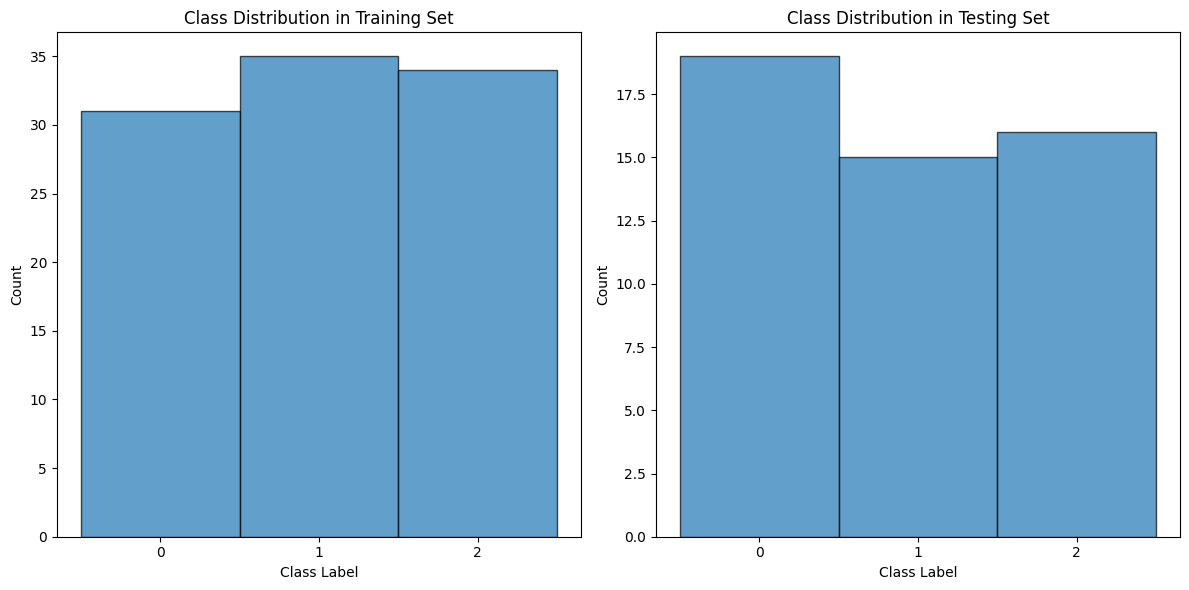

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset
with open("dataset.pkl", 'rb') as f:
    dataset = pickle.load(f)

num_classes = 3
y_train_labels = np.argmax(dataset['y_train'], axis=1)
y_test_labels = np.argmax(dataset['y_test'], axis=1)


# Plot class distribution for training set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(y_train_labels, bins=np.arange(num_classes+1)-0.5, edgecolor='k', alpha=0.7)
plt.xticks(np.arange(num_classes))
plt.title('Class Distribution in Training Set')
plt.xlabel('Class Label')
plt.ylabel('Count')


# Plot class distribution for testing set
plt.subplot(1, 2, 2)
plt.hist(y_test_labels, bins=np.arange(num_classes+1)-0.5, edgecolor='k', alpha=0.7)
plt.xticks(np.arange(num_classes))
plt.title('Class Distribution in Testing Set')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [3]:
print("Shape of x_train:", dataset['x_train'].shape)
print("Shape of y_train:", dataset['y_train'].shape)
print("Shape of x_train:", dataset['x_test'].shape)
print("Shape of y_train:", dataset['y_test'].shape)

Shape of x_train: (100, 4)
Shape of y_train: (100, 3)
Shape of x_train: (50, 4)
Shape of y_train: (50, 3)


In [4]:
# Training and Evaluation of Multi Class Logistic Model Performance on synthetic dataset (dataset.pkl)
import pickle
import numpy as np
import pandas as pd
from scipy.special import softmax
from copy import deepcopy
import matplotlib.pyplot as plt

def permute_data(X, y):
    """ Randomly permute data """
    perm = np.random.permutation(len(X))
    return X[perm], y[perm]


def softmax_stable(Z, axis=1):
    ## <! code required> Optional: You can prevent Overflow by subtracting the inputs with the maximum value in the input set.
    # Based on the equation of softmax
    max_z = np.max(Z, axis=axis, keepdims=True)
    numerator = np.exp(Z - max_z)
    denominator = np.sum(numerator, axis=axis, keepdims=True)
    softmax = numerator / denominator
    return softmax


def logistic_regression_grad(X, y_onehot, w, reg_lambda):
    """
    y_onehot: onehot encoded labels
    """
    ## <! code required>
    # Gradient of logistic regression loss:
    # Gradient of L(w) = (-1/m) * X^T(Y-P) + 2*lambda*w
    Z = X @ w
    P = softmax_stable(Z, axis=1)
    m = len(X)
    log_reg_grad = (-1/m) * X.T @ (y_onehot - P) + 2*reg_lambda*w
    return log_reg_grad


def logistic_regression_loss(X, y_onehot, w, reg_lambda):
    ## <! code required>  Optional: You can prevent log of zero happening by adding small constant(epsilon)
    # Logistic regression loss with regularization:
    # L(w) = (-1/m) * sum(y_onehot * log(p)) + lambda + sum(w^2))
    epsilon = 1e-20
    Z = X @ w
    P = softmax_stable(Z, axis=1)
    log_P = np.log(P + epsilon)
    m = len(X)
    log_reg_loss = (-1/m) * np.sum(y_onehot * log_P) + (reg_lambda/2) * np.sum(w * w)
    return log_reg_loss


def multiclass_accuracy(X, y_onehot, w):
    Z =  X @ w
    P = softmax_stable(Z, axis=1)
    predictions = np.argmax(P, axis=1)
    true_labels = np.argmax(y_onehot, axis=1)
    return np.mean(predictions == true_labels)


def training_multiclass_reg(X_train, y_train, X_validation, y_validation, w, STEP_SIZE, reg_lambda):
    BATCH_SIZE = 16
    NUM_TRAIN = len(X_train)
    X_p, y_p = permute_data(X_train, y_train)
    epoch_loss_history = []

    for epoch in range(NUM_EPOCHS):
        epoch_loss = AverageMeter()
        for i in range(0, NUM_TRAIN, BATCH_SIZE):
            X_batch = X_p[i: min(i + BATCH_SIZE, NUM_TRAIN)]
            y_batch = y_p[i: min(i + BATCH_SIZE, NUM_TRAIN)]
            loss = logistic_regression_loss(X_batch, y_batch, w, reg_lambda)
            epoch_loss.update(loss)
            grad = logistic_regression_grad(X_batch, y_batch, w, reg_lambda)

            ## <! code required>
            # update the weight: w_t+1 = w_t - learning_rate* g_t
            w -= STEP_SIZE * grad

        epoch_loss_history.append(epoch_loss.avg)
        X_p, y_p = permute_data(X_train, y_train)
    return w, epoch_loss_history


class AverageMeter:
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count



# Load Dataset
with open("dataset.pkl", 'rb') as f:
    dataset = pickle.load(f)


# Parameters
NUM_EPOCHS = 500
STEP_SIZE = 0.01
FEAT_SIZE = dataset['x_train'].shape[1]
NUM_CLASSES = dataset['y_train'].shape[1]
INIT_W = np.random.randn(FEAT_SIZE, NUM_CLASSES)

# Parameters for regularization (lambda_values)
LAMBDA1, LAMBDA2 = 1e-4, 1e-2

# Training and Evaluation
# Re-training with LAMBDA1 (1e-4)
w_final_1, epoch_loss_1 = training_multiclass_reg(dataset['x_train'], dataset['y_train'],
                                                  dataset['x_test'], dataset['y_test'],
                                                  deepcopy(INIT_W), STEP_SIZE, LAMBDA1)



val_loss_1 = logistic_regression_loss(dataset['x_test'], dataset['y_test'], w_final_1, LAMBDA1)
val_acc_1 = multiclass_accuracy(dataset['x_test'], dataset['y_test'], w_final_1)


# Re-training with LAMBDA2 (1e-2)
w_final_2, epoch_loss_2 = training_multiclass_reg(dataset['x_train'], dataset['y_train'],
                                                  dataset['x_test'], dataset['y_test'],
                                                  deepcopy(INIT_W), STEP_SIZE, LAMBDA2)


val_loss_2 = logistic_regression_loss(dataset['x_test'], dataset['y_test'], w_final_2, LAMBDA2)
val_acc_2 = multiclass_accuracy(dataset['x_test'], dataset['y_test'], w_final_2)

print(val_loss_1, val_acc_1, val_loss_2, val_acc_2)

0.21837941815941844 0.9 0.30754776900979297 1.0


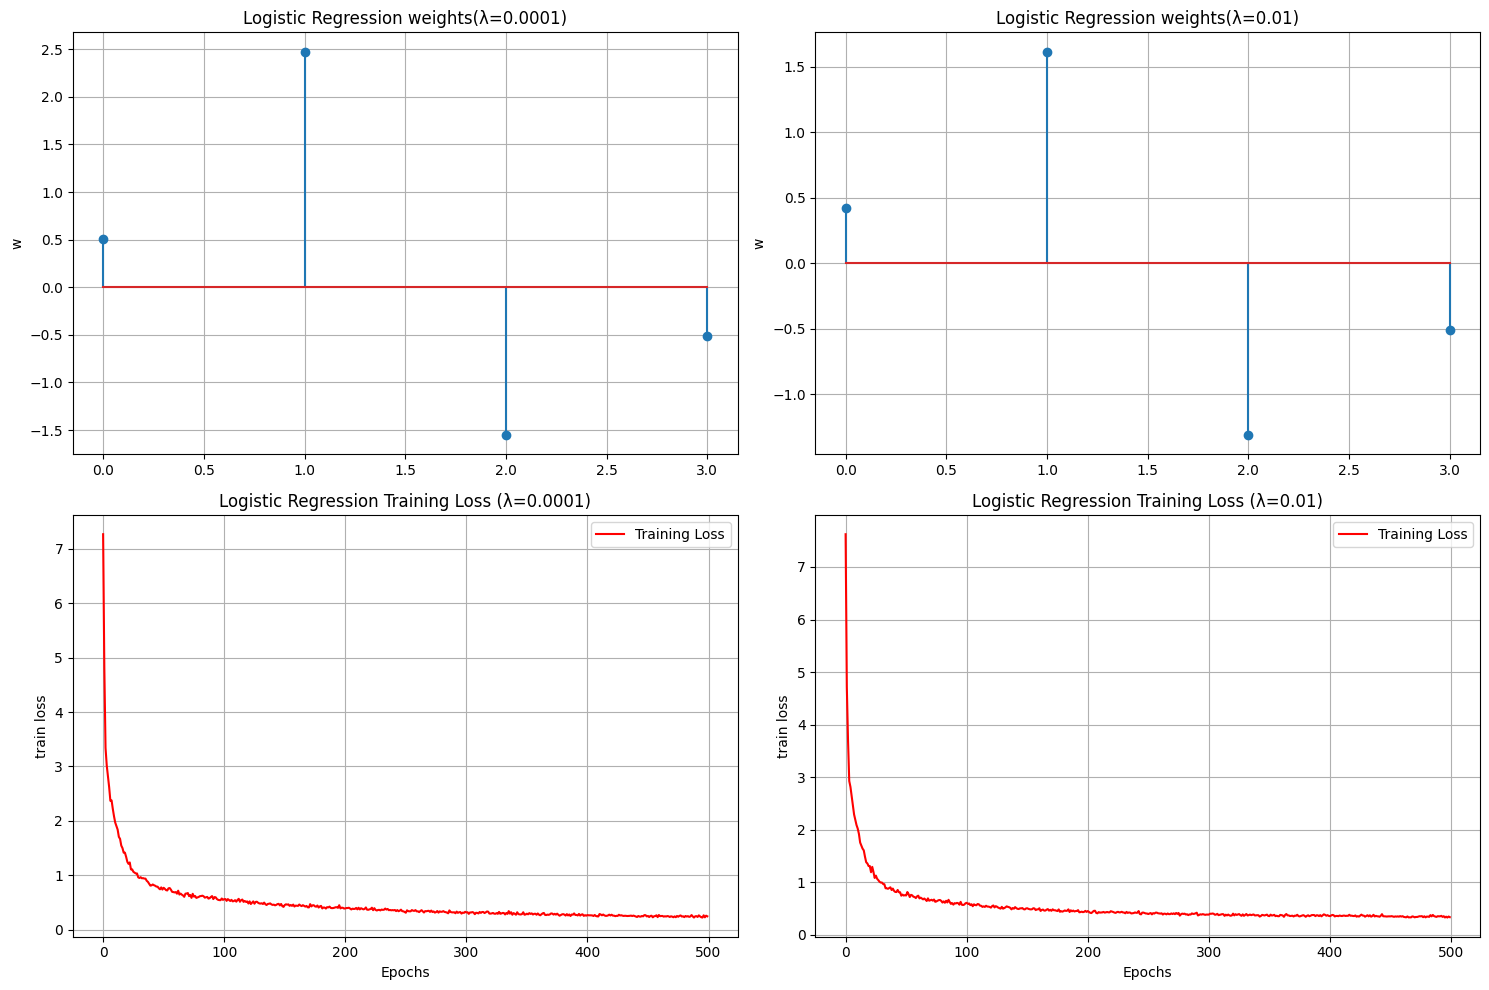

In [5]:
# Visualizing the learned weights, their differences, and the train/validation loss on the iris dataset
fig, ax = plt.subplots(nrows=2, ncols=2)

# Weights for λ=LAMBDA1
ax[0, 0].stem(list(range(FEAT_SIZE)), w_final_1[:, 0])
ax[0, 0].grid()
ax[0, 0].set_title(f'Logistic Regression weights(λ={LAMBDA1})')
ax[0, 0].set_ylabel('w')


# Weights for λ=LAMBDA2
ax[0, 1].stem(list(range(FEAT_SIZE)), w_final_2[:, 0])
ax[0, 1].grid()
ax[0, 1].set_title(f'Logistic Regression weights(λ={LAMBDA2})')
ax[0, 1].set_ylabel('w')



# Train/validation loss for λ=LAMBDA1 & λ=LAMBDA2
# Note: We only have the training losses in the current setup.
ax[1, 0].plot(list(range(NUM_EPOCHS)), epoch_loss_1, "r", label="Training Loss")
ax[1, 0].grid()
ax[1, 0].set_title(f'Logistic Regression Training Loss (λ={LAMBDA1})')
ax[1, 0].set_ylabel('train loss')
ax[1, 0].set_xlabel('Epochs')
ax[1, 0].legend()


ax[1, 1].plot(list(range(NUM_EPOCHS)), epoch_loss_2, "r", label="Training Loss")
ax[1, 1].grid()
ax[1, 1].set_title(f'Logistic Regression Training Loss (λ={LAMBDA2})')
ax[1, 1].set_ylabel('train loss')
ax[1, 1].set_xlabel('Epochs')
ax[1, 1].legend()

fig.set_size_inches(15, 10)
plt.tight_layout()

plt.show()


After building and training your multi-class logistic regression model, validating its performance against a tried-and-tested implementation is a good practice. Scikit-learn offers a robust LogisticRegression module that can be utilized for this purpose. By comparing results, you can ensure the integrity of your custom implementation and diagnose any potential issues. You can run the below code cell, which employs Scikit-learn's logistic regression on your dataset for this validation.

In [6]:
# Validating Performance from Scikitlearn LogisticRegression on iris dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the multiclass dataset
with open("dataset.pkl", 'rb') as f:
    dataset = pickle.load(f)

# Extract data
X_train, y_train, X_test, y_test = dataset['x_train'], dataset['y_train'], dataset['x_test'], dataset['y_test']

# Convert one-hot encoded labels back to their integer labels for sklearn
y_train_int = np.argmax(y_train, axis=1)
y_test_int = np.argmax(y_test, axis=1)

# Train a logistic regression model using sklearn
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial')
clf.fit(X_train, y_train_int)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
sklearn_accuracy = accuracy_score(y_test_int, y_pred)
sklearn_accuracy


1.0

**Q4.3**: **Hyper-parameter Tuning**  
Please use different $λ$ / lambda values in your defined multi-class logistic regression algorithm to find the best $λ$ / lambda for the provided step size with minimum loss on the validation set.

Specifically, you should use the validation set to determine the best value for each $λ$ \lambda for the provided step size with its corresponding validation error/loss.



Lambda Loop:   0%|          | 0/9 [00:00<?, ?it/s]

<ipython-input-4-a8a93321e077>:48: RuntimeWarning: overflow encountered in double_scalars
  log_reg_loss = (-1/m) * np.sum(y_onehot * log_P) + (reg_lambda/2) * np.sum(w * w)
<ipython-input-4-a8a93321e077>:48: RuntimeWarning: overflow encountered in multiply
  log_reg_loss = (-1/m) * np.sum(y_onehot * log_P) + (reg_lambda/2) * np.sum(w * w)
<ipython-input-4-a8a93321e077>:35: RuntimeWarning: overflow encountered in multiply
  log_reg_grad = (-1/m) * X.T @ (y_onehot - P) + 2*reg_lambda*w
<ipython-input-4-a8a93321e077>:44: RuntimeWarning: invalid value encountered in matmul
  Z = X @ w
<ipython-input-4-a8a93321e077>:32: RuntimeWarning: invalid value encountered in matmul
  Z = X @ w
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


The best λ is 0.01000 and its corresponding validation accuracy is 1.000


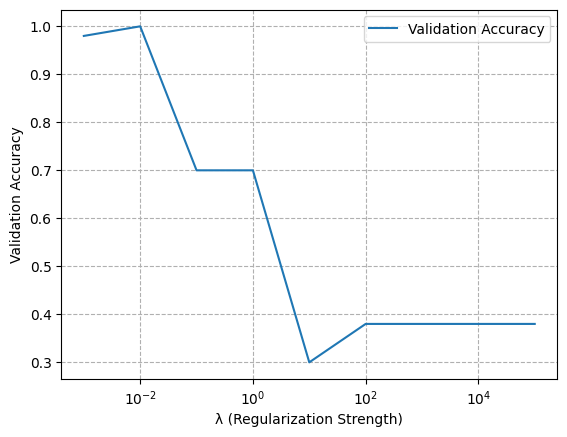

In [7]:
# Hyperparameter tuning on iris dataset
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from copy import deepcopy

# Define the hyperparameters you want to tune
## <! code required>
step_size = .01
lambdas = [0.001, 0.01, 0.1 ,1, 10, 100, 1000, 10000, 100000]

# Initialize variables to store the best values
best_lambda = None
best_validation_acc = 0

# Store accuracies for plotting
accuracies = []

# Loop over lambdas
for lambda_ in tqdm(lambdas, desc='Lambda Loop'):

    w_final, _ = training_multiclass_reg(dataset['x_train'], dataset['y_train'],
                                         dataset['x_test'], dataset['y_test'],
                                         deepcopy(INIT_W), step_size, lambda_)

    val_acc = multiclass_accuracy(dataset['x_test'], dataset['y_test'], w_final)
    accuracies.append(val_acc)

    # Update the best values if we found a better accuracy
    if val_acc > best_validation_acc:
        best_lambda = lambda_
        best_validation_acc = val_acc

# Print the best hyperparameters
print('The best λ is %.5f and its corresponding validation accuracy is %.3f' %
      (best_lambda, best_validation_acc))

# Plotting the results
fig, ax = plt.subplots()
ax.plot(lambdas, accuracies, label='Validation Accuracy')
ax.set_xlabel('λ (Regularization Strength)')
ax.set_ylabel('Validation Accuracy')
ax.set_xscale("log")
ax.grid(True, which="both", ls="--")
ax.legend()
plt.show()
